## Diamond Price Prediction

### Introduction About the Data :

**The dataset** goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
# Data Ingestion step.
## converting the data into data frame by reading from csv file using pandas.
df = pd.read_csv("data\gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [8]:
df.drop(columns="id",inplace=True)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [10]:
categorical_columns = df.columns[df.dtypes == "object"]
numerical_columns = df.columns[df.dtypes != "object"]
print("Categorical columns :",categorical_columns)
print("Numerical columns :",numerical_columns)

Categorical columns : Index(['cut', 'color', 'clarity'], dtype='object')
Numerical columns : Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [11]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [12]:
df["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [13]:
df["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [14]:
df["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

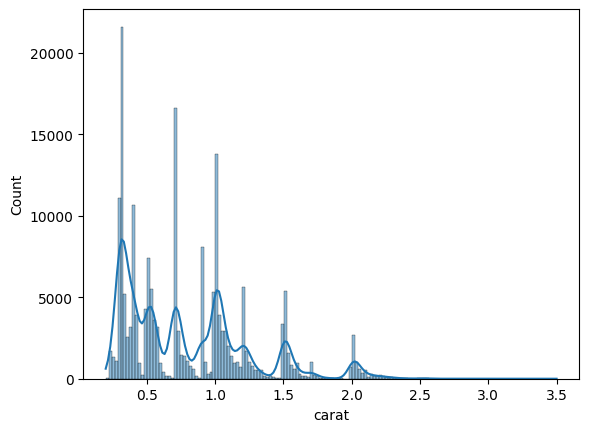

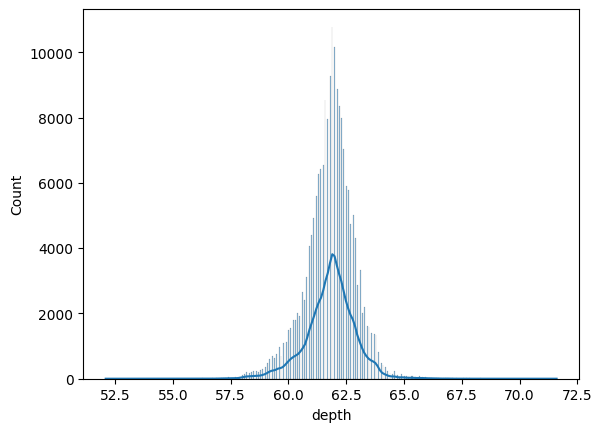

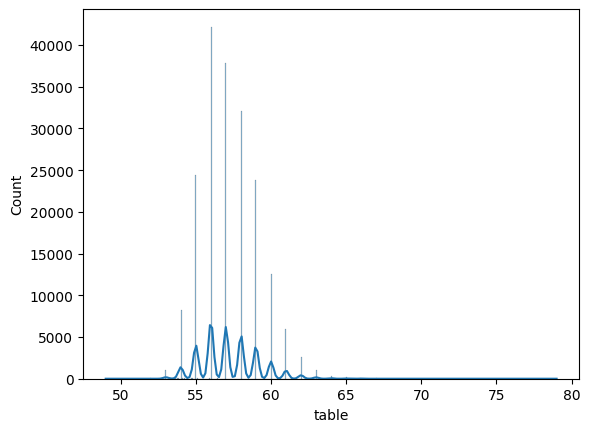

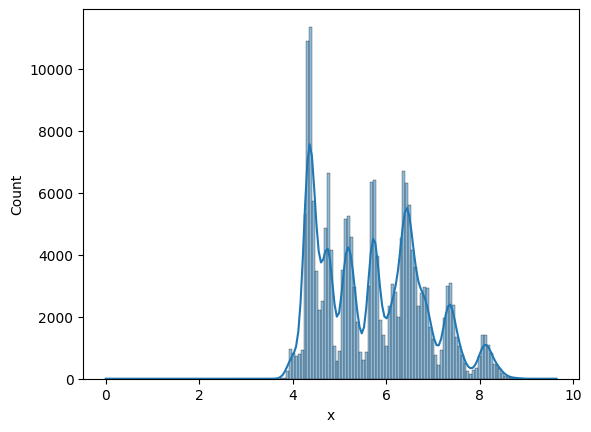

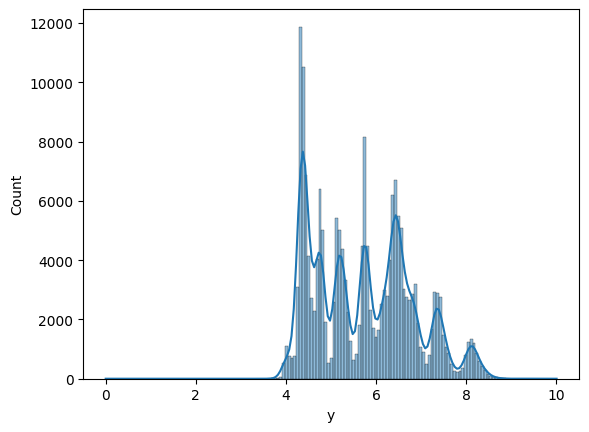

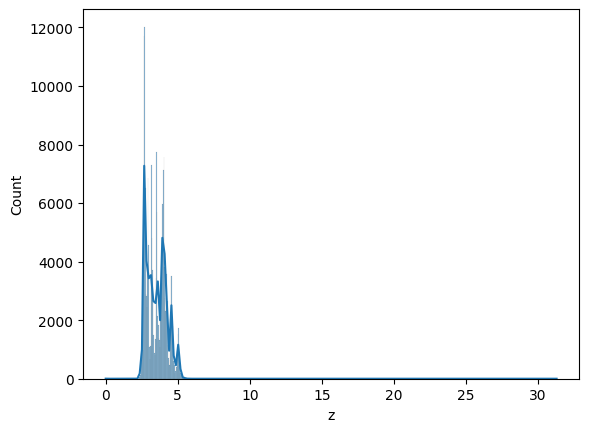

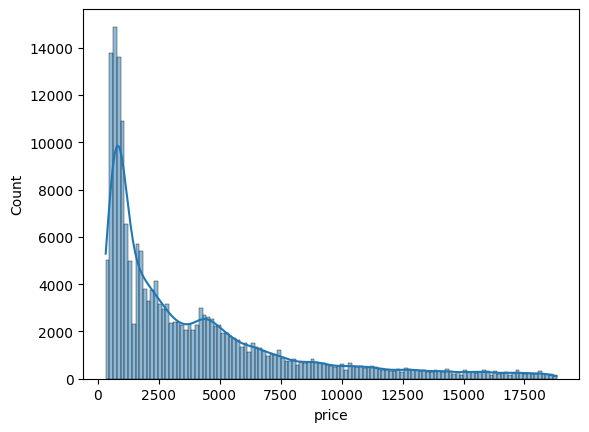

In [15]:
## Histplot for numerical data
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


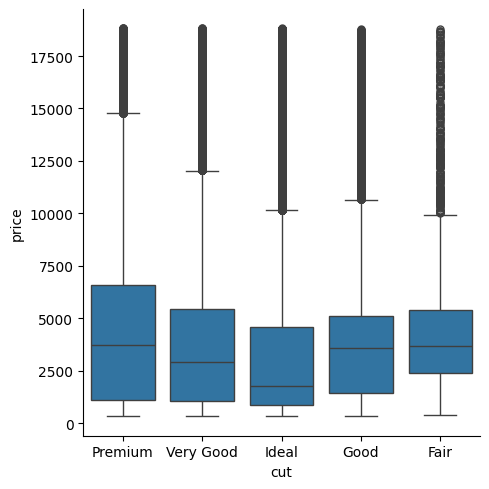

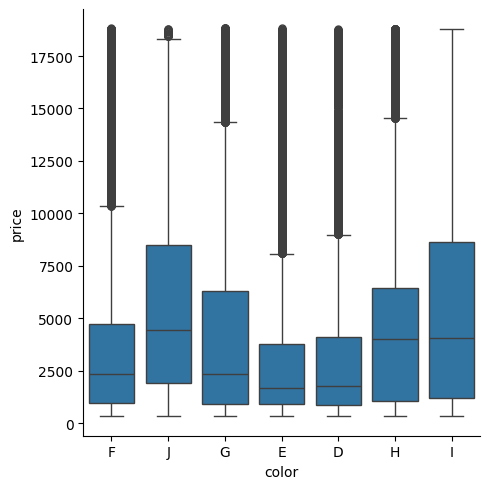

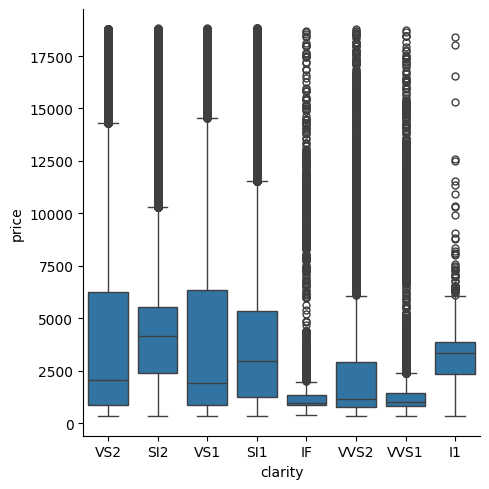

In [17]:
## Catplot for categorical data
x=0
for i in categorical_columns:
    sns.catplot(data=df,x=i,y="price",kind='box')
    plt.show()

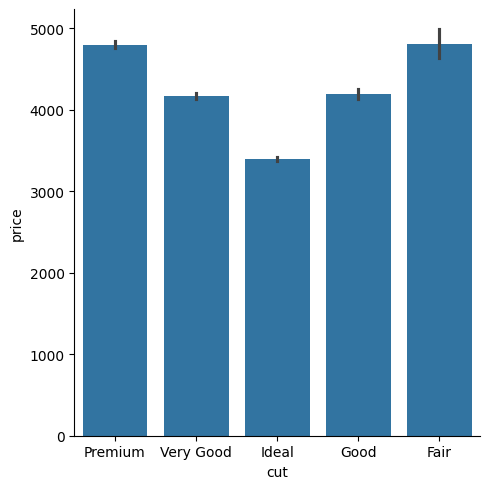

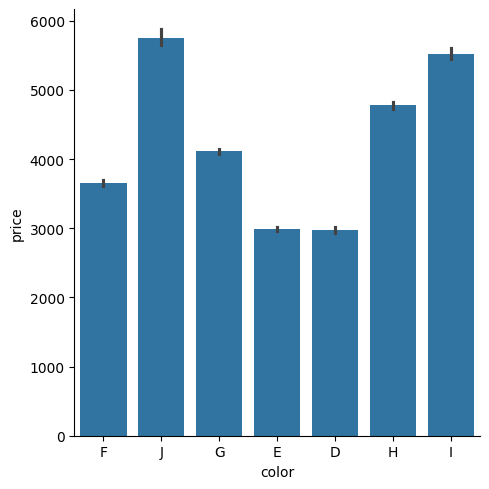

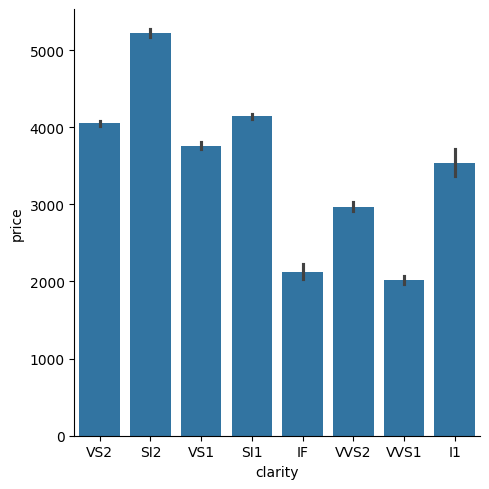

In [18]:
for i in categorical_columns:
    sns.catplot(data=df,x=i,y="price",kind='bar')
    plt.show()

<Figure size 1500x1000 with 0 Axes>

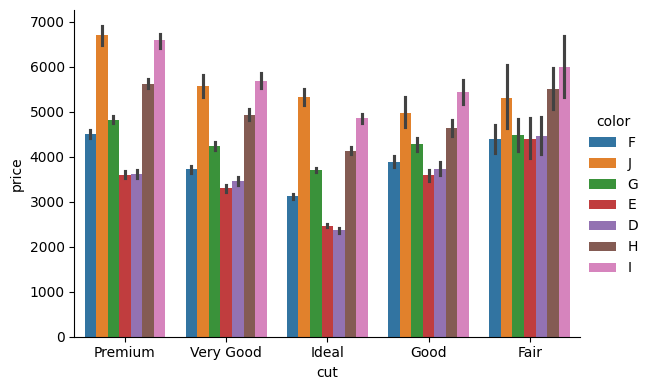

In [24]:
plt.figure(figsize=(15,10))
sns.catplot(x='cut', y='price', hue='color', data=df, kind='bar', estimator=np.mean,height=4, aspect=1.5)
plt.show()

<Figure size 1500x1000 with 0 Axes>

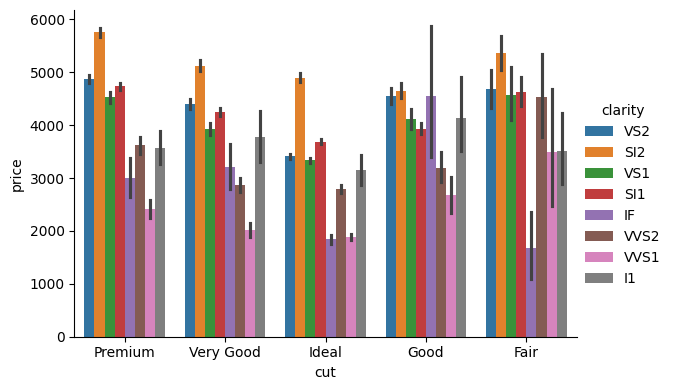

In [25]:
plt.figure(figsize=(15,10))
sns.catplot(x='cut', y='price', hue='clarity', data=df, kind='bar', estimator=np.mean,height=4, aspect=1.5)
plt.show()

In [30]:
## For Domain Purpose visit this site https://www.americangemsociety.org/ags-diamond-grading-system/
print("Cut -",df['cut'].unique())
print("Clarity -",df['clarity'].unique())
print("Color -",df['color'].unique())

Cut - ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
Clarity - ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']
Color - ['F' 'J' 'G' 'E' 'D' 'H' 'I']


In [31]:
## Ranking categorical variables with respect to the above mentioned domain.
cut_map={"Fair":5,"Good":4,"Very Good":3,"Premium":2,"Ideal":1}
clarity_map = {"I1":8, "SI2":7, "SI1":6, "VS2":5, "VS1":4, "VVS2":3, "VVS1":2, "IF":1}
color_map = {"D":7, "E":6, "F":5, "G":4,"H":3, "I":2,"J":1}

In [32]:
df["cut"] = df["cut"].map(cut_map)
df["clarity"] = df["clarity"].map(clarity_map)
df["color"] = df["color"].map(color_map)

In [33]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,2,5,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,7,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,1,4,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,1,4,4,61.6,56.0,4.38,4.41,2.71,666
4,1.70,2,4,5,62.6,59.0,7.65,7.61,4.77,14453
